<a href="https://colab.research.google.com/github/amaan-zafar/data-science-python/blob/3-EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 Importing libraries**

In [199]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

**2 Importing dataset**
- Figure out the delimiter. Here its '\t'

In [200]:
df_data = pd.read_csv('Salesstore.csv', sep ='\t')
df_data.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


**3 Analysing the dataset overall**
- Finding the 'shape' of the dataset
- Knowing the columns (characteristics), their data types and whether they contain null values or not
- Getting important stats of numeric data

In [201]:
df_data.shape

(730, 13)

***Observation***
- Dataset comprises of 730 observations and 13 characteristics.

In [202]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


***Observation***
- Dataset contains int, float and object type values.
- No variable column has null/missing values.

In [203]:
df_data.describe()

,Order_ID,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000,730.000000
mean,29721.597260,24.857534,1502.777653,207.479233
std,17350.560439,14.182970,2893.936648,878.631028
min,35.000000,1.000000,8.600000,-4437.910000
25%,14479.000000,13.000000,171.098375,-77.132500
50%,29350.500000,25.000000,438.700000,0.035000
75%,44978.500000,37.000000,1480.855000,180.000000
max,59909.000000,50.000000,27663.920000,8417.570000


***Observation***
1. Mean values of Sales and Profit are much greater than their median values (50%).
2. There is notably a large difference between 75th %tile and max values of Sales and Profit.

***Inference***

Observations 1 and 2 suggests that there are **extreme values-Outliers** for Sales and Profit data.

---
**4 Analysing the characteristics**

In [204]:
len(df_data['Order_ID'].unique())

571

In [205]:
len(df_data['Product_Name'].unique())

446

***Inference***
- Since, the unique number of Order_ID and Product_Name are very large, it can be concluded that they do not give any significant information about the dataset. Hence, these can be removed from the dataset.

In [206]:
# Saving the Order ID and Product Name in the sequence of application in another dataframe
df_id = df_data['Order_ID']
df_pname = df_data['Product_Name']

#Dropping Order ID and product name from Featureset
df_data=df_data.drop(columns='Order_ID')
df_data=df_data.drop(columns='Product_Name')
df_data.columns

Index(['Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode', 'Profit',
       'Customer_Name', 'Region', 'Customer_Segment', 'Product_Category',
       'Product_Sub-Category', 'Product_Container'],
      dtype='object')

**5 Categorising columns**

**Continous Columns**

In [207]:
num_cols = df_data._get_numeric_data().columns
cont_cols = []
int(df_data.shape[0]/25)
for i in num_cols:
  if(len(df_data[i].unique())) > int(df_data.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['Order_Quantity', 'Sales', 'Profit']


**Categorical Columns**

In [208]:
cat_cols = list(set(df_data.columns) - set(cont_cols))
cat_cols

['Product_Container',
 'Region',
 'Order_Priority',
 'Ship_Mode',
 'Customer_Segment',
 'Product_Category',
 'Product_Sub-Category',
 'Customer_Name']

---
**6 UNIVARIATE ANALYSIS**

**(a) Order Quantity**

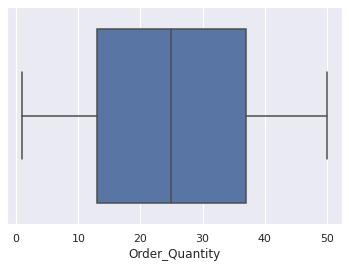

In [209]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_data["Order_Quantity"])

***Observation***

- Order Quantity lies between 0 to 50 and the maximum order quantity are between 14(approx) to 35(approx)

**(b) Customer Segment**

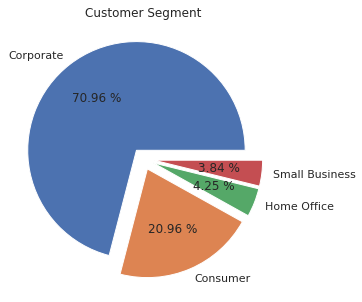

Corporate         518
Consumer          153
Home Office        31
Small Business     28
Name: Customer_Segment, dtype: int64

In [210]:
plt.figure(figsize = (5,5))
corp = df_data.loc[df_data['Customer_Segment'] == 'Corporate'].count()[0]
cons = df_data.loc[df_data['Customer_Segment'] == 'Consumer'].count()[0]
hoff = df_data.loc[df_data['Customer_Segment'] == 'Home Office'].count()[0]
sbiz = df_data.loc[df_data['Customer_Segment'] == 'Small Business'].count()[0]
explode = (0.1, 0.1, 0.1, 0.1)
labels = ['Corporate', 'Consumer', 'Home Office', 'Small Business']
plt.pie([corp, cons, hoff, sbiz], labels = labels, autopct = '%.2f %%', explode = explode)
plt.title("Customer Segment")
plt.show()

df_data.Customer_Segment.value_counts()

**(c) Ship Mode**

Regular Air    579
Express Air    151
Name: Ship_Mode, dtype: int64

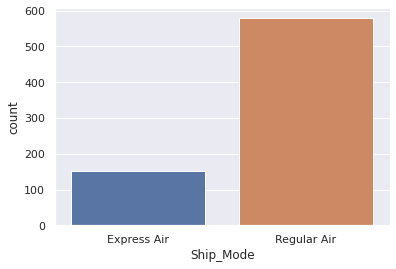

In [211]:
sns.countplot(df_data.Ship_Mode)
df_data.Ship_Mode.value_counts()

***(d) Region***

West                     232
Atlantic                 170
Northwest Territories    150
Prarie                    79
Ontario                   67
Nunavut                   32
Name: Region, dtype: int64

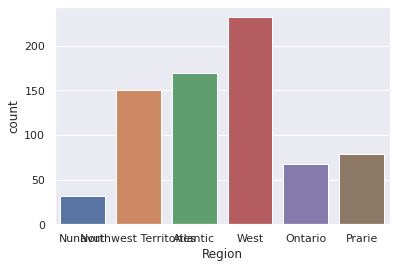

In [212]:
sns.countplot(df_data.Region)
df_data.Region.value_counts()

**(e) Product Category**

Office Supplies    447
Technology         185
Furniture           98
Name: Product_Category, dtype: int64

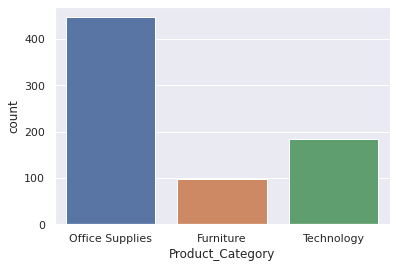

In [213]:
sns.countplot(df_data.Product_Category)
df_data.Product_Category.value_counts()

**(f) Product Container**

Small Box     606
Large Box      63
Medium Box     61
Name: Product_Container, dtype: int64

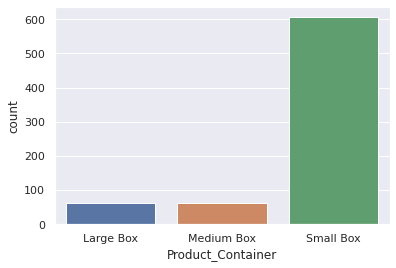

In [214]:
sns.countplot(df_data.Product_Container)
df_data.Product_Container.value_counts()

**(g) Priority**

Not Specified    156
High             152
Low              147
Critical         147
Medium           128
Name: Order_Priority, dtype: int64

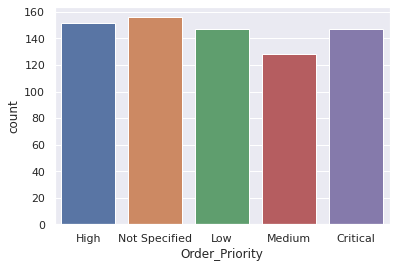

In [215]:
sns.countplot(df_data.Order_Priority)
df_data.Order_Priority.value_counts()

---
**BIVARIATE ANALYSIS**

**Profit Vs Sales**

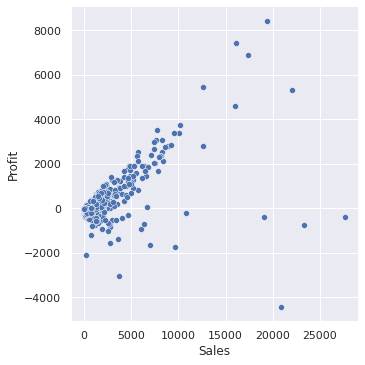

In [216]:
sns.relplot('Sales', 'Profit', data = df_data)

***Observation***
- For most of the purchases, the profit is increasing with increasing sales. 

***Inference***
- There is a **positive correlation** between sales nd profit. Most sales lie between 0 and 10000.

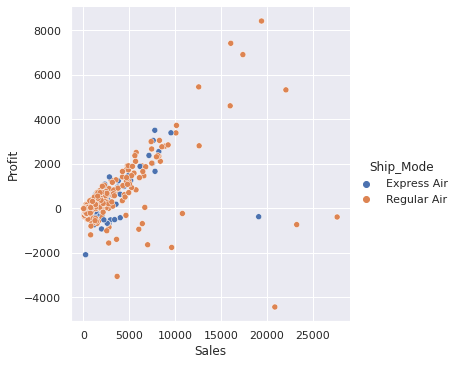

In [217]:
sns.relplot('Sales', 'Profit', data = df_data, hue = 'Ship_Mode')

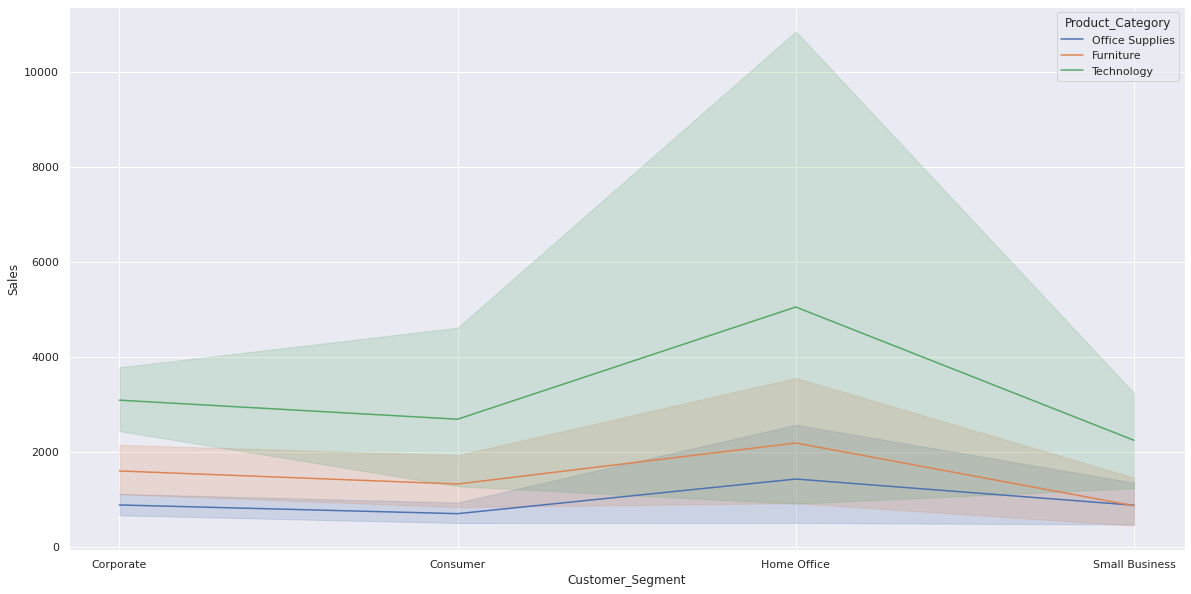

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_data, x="Customer_Segment", y="Sales",ax=ax,hue="Product_Category")

***Observation***
- Sales of Technology are maximum ranging from - 1000 to 11000
- Sales of furniture ranges from - 1000 to 3000(approx)
- Sales of office Supplies ranges from - 100 to 2000
- Sales of all three product categories are highest for Home Office Segment